
# Generating Movie Recommendations

### Unsupervised_Learning_ZM6

1. Noxolo Ngcobo
2. Mora Magakwe
3. Sandra Malope
4. Katleho Moketo
5. Matthews Montle


## Introduction

Recommendation systems are becoming increasingly important in today’s extremely busy world. People are forever short on time due to the tasks they need to accomplish in the limited time they have. Therefore, the recommendation systems are very important as they assist in making the right choices.

The purpose of a recommendation system basically is to search for content that would be interesting to an individual. Moreover, it involves a number of factors to create personalised lists of useful and interesting content specific to each user/individual. Recommendation systems are Artificial Intelligence based algorithms that skim through all possible options and create a customized list of items that are interesting and relevant to an individual. These results are based on their profile, search/browsing history, what other people with similar traits/demographics are watching, and how likely are you to watch those movies. This is achieved through predictive modeling and heuristics with the data available.

# Problem statement:what should I watch next?

construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.













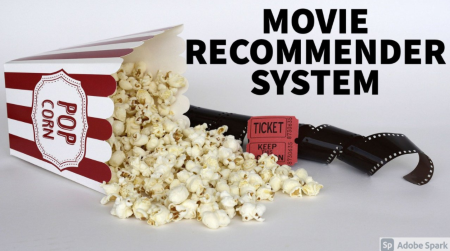

# Table of contents
   * Start of comet experiment
   * Installing packages
   * Reading in data
   * Properties of the data
   * Exploratory data analysis
     * Insights for ratings
     * Insights for genres
     * Insights for year of release
     * Insights on actors
     * Insights on directors
   * Data preparation and cleaning
   * Modelling Phase:Building recommendation system
     * Content based filtering
     * Collaborative filtering
   * Generate outputs
   * Conclusion
   * End of comet experiment
   * References
   
   
   
   
   
   
   

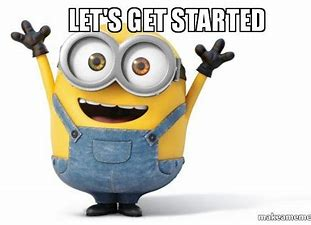

## Start of comet experiment 

In [1]:
# comet experiment


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Installing packages
Here we will load important libraries that will help us with building the recommender system.

In [4]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import BaselineOnly
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

# Reading in data

Here we will import the dataframes we are interested in working with.

In [5]:
#df_sample_submission = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv')
#df_movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/movies.csv')
#df_imdb = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv')
#df_genome_scores = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv')
#df_genome_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv')
#df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/train.csv')
#df_test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/test.csv')
#df_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/tags.csv')
#df_links = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/links.csv')

In [6]:
df_sample_submission = pd.read_csv('sample_submission.csv')
df_movies = pd.read_csv('movies.csv')
df_imdb = pd.read_csv('imdb_data.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv') 

# Properties of the data

Before we can use the data in any meaningful way, we must first understand our data. In this section we explore the data in each dataframe in order to understand it.

In [7]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [6]:
df_imdb.shape

(27278, 6)

The imbd table consists of 6 columns and 27 278 rows. Each row of the imbd table contains a movie ID and the cast, director, runtime, budget and plot keywords pertaining to the movie referenced by the movie ID.

In [7]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
len(df_links)

62423

Each of the 62 423 rows of the links table has a movie ID, the imdb ID and tmdb ID of the movie referenced by the movie ID.

In [10]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [11]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [12]:
len(df_genome_scores)

15584448

The genome_scores DataFrame has more than 15584448 million rows.

In [13]:
df_genome_scores['movieId'].nunique()

13816

In [14]:
df_genome_scores['tagId'].nunique()

1128

Each row of the genome_scores DataFrame contains a movie ID, a tag ID and a relevance score indicating the relevance of the tag referenced by the tag ID to the movie referenced by the movie ID. This data spans 13 816 movies and 1 128 tags.

In [15]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [16]:
len(df_tags)

1093360

The tags table contains tags associated with movies by users, the movie ID of the movie, user ID of the user and number of seconds that have elapsed from 1st January 1970 to when the tag was created by the user.

In [94]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
df_movies.shape

(62423, 3)

In [19]:
len(df_movies)

62423

In [20]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [21]:
df_train.shape

(10000038, 4)

In [22]:
len(df_train)

10000038

In [23]:
df_train['userId'].nunique()

162541

In [24]:
df_train['movieId'].nunique()

48213

In [25]:
df_train['rating'].unique()

array([4. , 4.5, 5. , 2. , 3. , 1. , 3.5, 2.5, 0.5, 1.5])

In [26]:
df_train['rating'].nunique()

10

In [27]:
df_train['movieId'].nunique() < df_movies['movieId'].nunique()

True

Each of the 10 000 038 rows of the train_df DataFrame contains a rating (given by a user and pertaining to a movie). The train_df DataFrame spans 162 541 unique users, 48 213 unique movies. The ratings constitute a finite set of 10 values.


In [28]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [29]:
len(df_test)

5000019

In [30]:
df_test['movieId'].nunique()

39643

In [31]:
df_test['userId'].nunique()

162350

In [32]:
df_test['userId'].nunique() == df_train['userId'].nunique()

False

In [33]:
df_train['userId'].nunique() > df_test['userId'].nunique()

True

There are more users in the training data than the test data.

In [10]:
# Merge train with movies to join movie titles and ratings 
ratings = df_train.merge(df_movies, on='movieId', how='inner')
ratings.drop('timestamp', axis=1, inplace=True)

# EDA(Exploratory data analysis)
Exploratory data analysis is how we describe the practice of investigating a dataset and summarizing its main features.EDA focuses on understanding the characteristics of a dataset before deciding what we want to do with that dataset.

Exploratory data analytics often uses visual techniques, such as graphs, plots, and other visualizations.


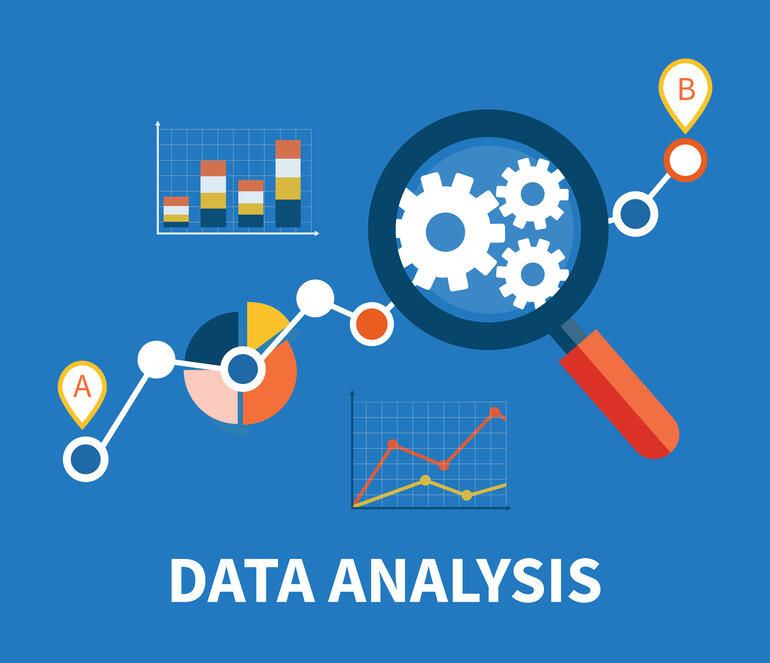


We start by selecting the movie features we want to investigate and create a new dataframe containing these features,the data is then formatted to make our lives easier when we start with the EDA

In [11]:
df = df_imdb[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(df_movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry,Comedy|Romance,Grumpier Old Men (1995)
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Comedy,Father of the Bride Part II (1995)


## 1.Insights for ratings

### Top  10 Most rated movies

In [12]:
# Determine the average rating and number of ratings for each movie
ratings_mean_count = pd.DataFrame(ratings.groupby(['title'])[['rating']].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count())
ratings_mean_count['popularity'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count()*ratings.groupby(['title'])['rating'].mean())

In [13]:
# Extract and display the 10 most popular films in the dataset 
ratings_mean_count = ratings_mean_count.sort_values(by='popularity', ascending=False).head(15)
ratings_mean_count.head(10)

,rating,rating_counts,popularity
title,,,
"Shawshank Redemption, The (1994)",4.417624,32831,145035.0
Pulp Fiction (1994),4.195097,31697,132972.0
Forrest Gump (1994),4.047216,32383,131061.0
"Silence of the Lambs, The (1991)",4.144172,29444,122021.0
"Matrix, The (1999)",4.154253,29014,120531.5
Star Wars: Episode IV - A New Hope (1977),4.111811,27560,113321.5
Schindler's List (1993),4.247625,24004,101960.0
Fight Club (1999),4.227906,23536,99508.0
Star Wars: Episode V - The Empire Strikes Back (1980),4.146236,22956,95181.0


* From the table above,these are the top 10 most rated movies. The Shawshank Redemption is the most rated movie,it is therefore a fair assumption to assume that it could be the most watched movie in our data set, But lets explore futher before making any conclusion.
* We also see from the table above some of the most popular movies like Star Wars,Matrix are in the top 10 most rated movies
* This proves that normally  most good movies recieve high ratings
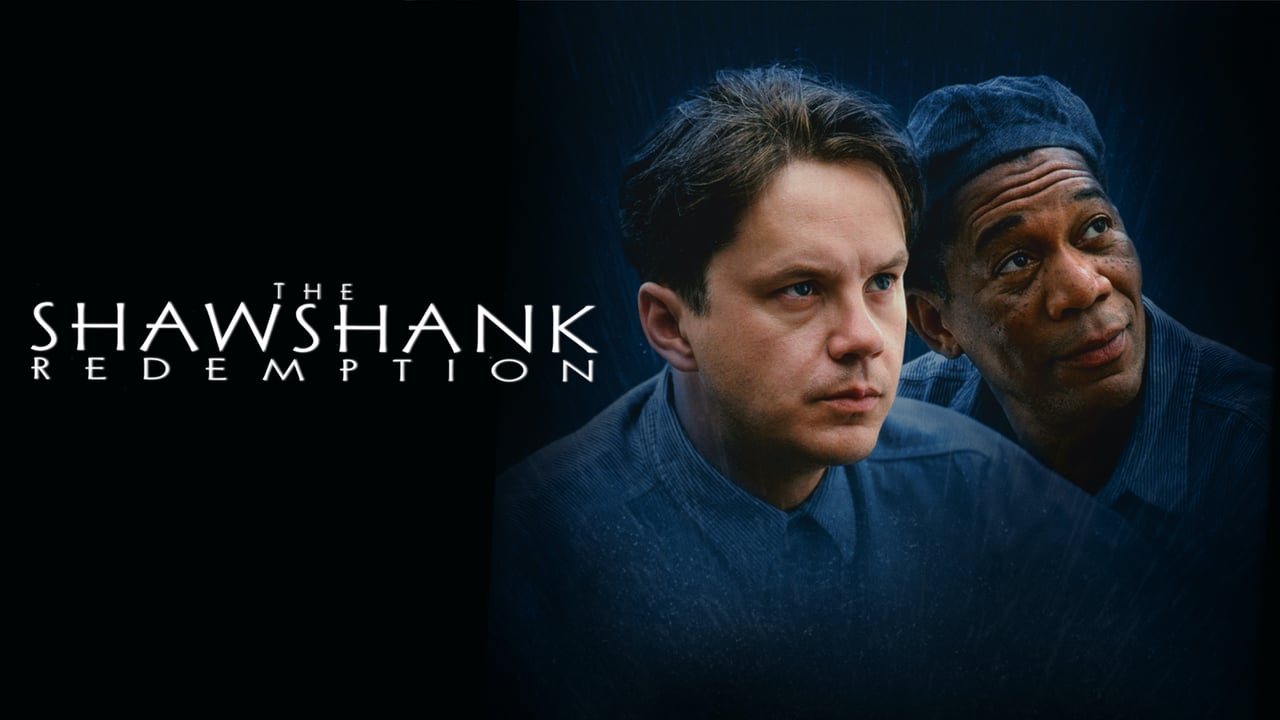



### Top 10 Most watched movies

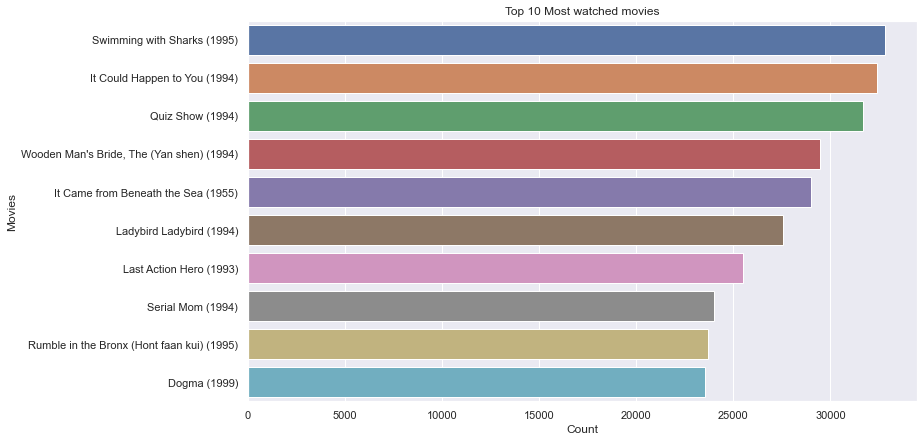

In [109]:
top_ten_rated_movies = ratings_df.groupby('movieId').size().sort_values(ascending=False)[:10]
top_ten_movie_titles = df_movies.iloc[top_ten_rated_movies.index].title
plt.figure(figsize=(12, 7))
sns.barplot(y=top_ten_movie_titles.values, x=top_ten_rated_movies.values, orient='h')
plt.title('Top 10 Most watched movies')
plt.ylabel('Movies')
plt.xlabel('Count')
plt.show()

The above bar graph shows the top 10 most watched movies from 1955,it therefore a fair assumption that these movies were probably peoples favourite movies to watch at that time.There movies were:

* Swimming with sharks 
* It could happen to you
* Quiz show 
* Wooden man's bride
* It came from beneath the sea
* Ladybird Ladybird
* Last Action hero
* serial mom
* Rumble in the Bronx
* Dogma


This also shows that good movies will be watch more often as compared to others.

In [61]:
# To find the number of times a user rated a movie
user_df = pd.DataFrame(
    df_train['userId'].value_counts()).reset_index()
user_df.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
user_df.head(10)

,userId,count
0,72315,12952
1,80974,3680
2,137293,3588
3,33844,3208
4,20055,3050
5,109731,2671
6,49403,2670
7,92046,2579
8,110971,2288
9,30879,2284


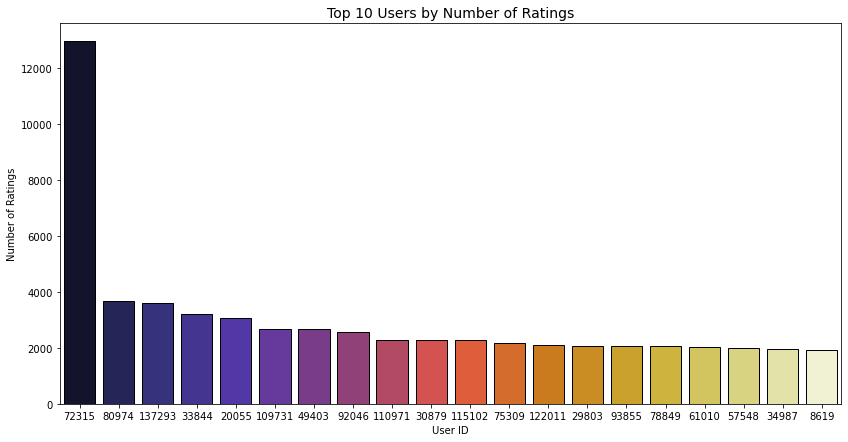

In [42]:
plt.figure(figsize=(14,7))
data = df_train['userId'].value_counts().head(20)
ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
plt.title(f'Top 10 Users by Number of Ratings', fontsize=14)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

The above output shows that user the with id **72315** has the highest rating count of **12952**

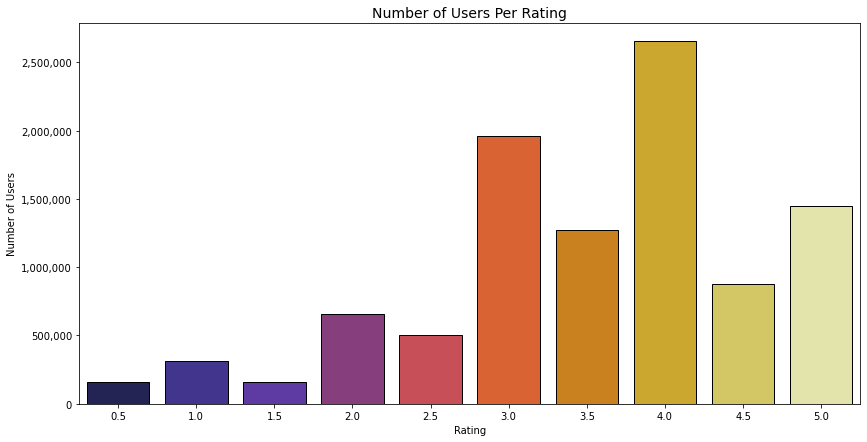

In [63]:
movieRating_Group = df_train['rating'].value_counts().sort_index().reset_index()
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=movieRating_Group, x='index', y='rating', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("Rating")
ax.set_ylabel('Number of Users')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
total = float(movieRating_Group['rating'].sum())
plt.title('Number of Users Per Rating', fontsize=14)
plt.show()

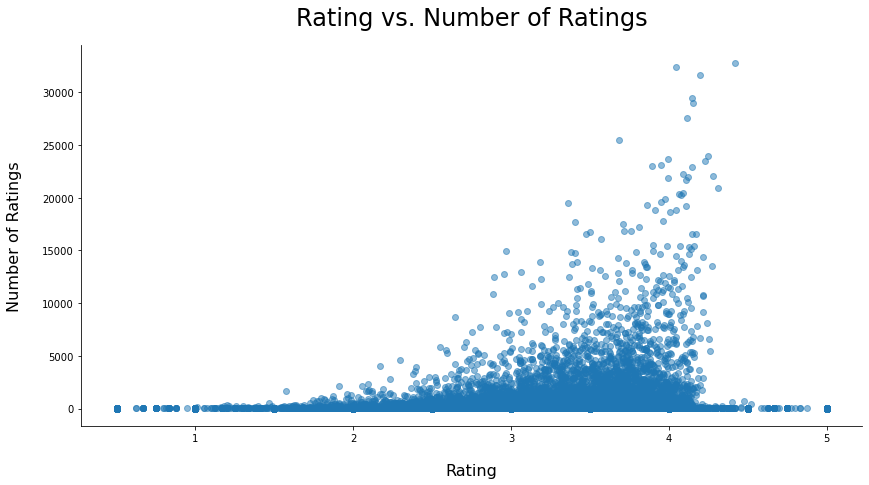

In [38]:
ratings_df = pd.DataFrame()
ratings_df['Mean_Rating'] = dataset.groupby('title')['rating'].mean().values
ratings_df['Num_Ratings'] = dataset.groupby('title')['rating'].count().values


fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Rating vs. Number of Ratings', fontsize=24, pad=20)
ax.set_xlabel('Rating', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.5)

From the scatter plot above for number of ratings vs raing is skewed to the right and shows a postive correlation between the two.

## 2.Insights on genres

### Most common Genres

In [82]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.tail()

,movieId,genres
112302,209163,Drama
112303,209169,(no genres listed)
112304,209171,Action
112305,209171,Adventure
112306,209171,Drama


From the table above we see that the Drama,Action and Adventure are our most common genres which could suggest that these are the most preferred genres when people pick movies to watch.

In [84]:
index_names = movies_genres[movies_genres['genres']=='(no genres listed)'].index
index2_names = movies_genres[movies_genres['genres']=='IMAX'].index
movies_genres.drop(index_names, inplace = True)
movies_genres.drop(index2_names, inplace = True)
movies_genres.tail()

,movieId,genres
112301,209163,Comedy
112302,209163,Drama
112304,209171,Action
112305,209171,Adventure
112306,209171,Drama


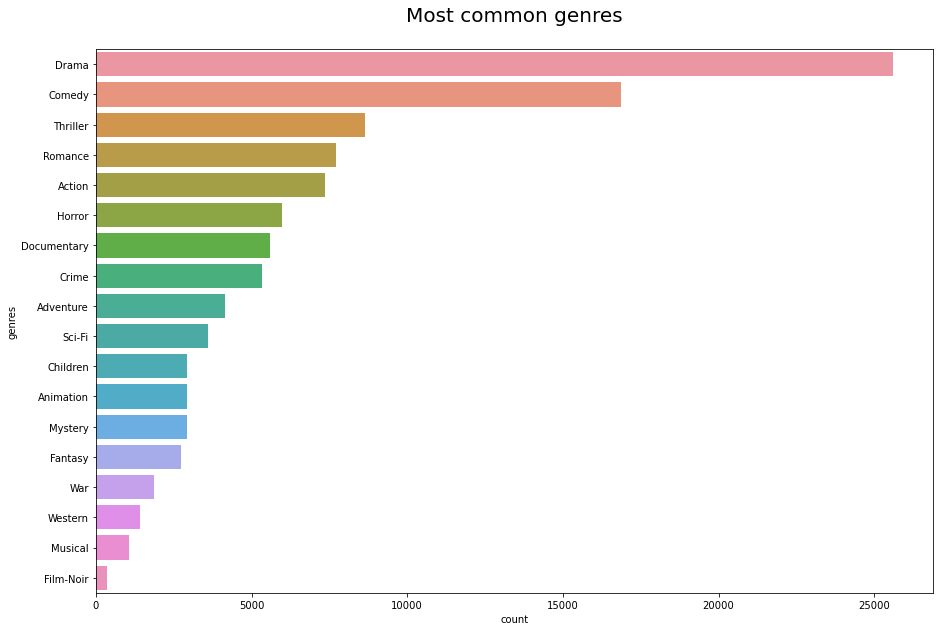

In [85]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index)
plt.show()

* There are 17 unique genres
* Majority of the films fall into the drama, comedy and thriller genres.
* Dramas account for 23%
* Comedies makes up 15% of the films
* 8% of the films fall into the thriller genre
* The Imax genre accounts for the smallest portion of the films in the dataset at less than 1% since this is a relatively new genre and the dataset goes back 50 years

here is a Word Cloud for the genres.


In [46]:
from wordcloud import WordCloud, STOPWORDS 

In [87]:
import wordcloud
all_words = ''.join([label for label in movies_genres['genres']])

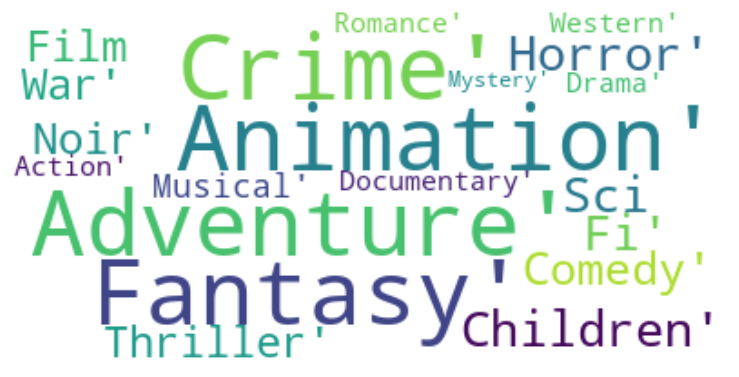

In [125]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
gen = movies_genres['genres'].explode()
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

The word could above shows some of the generes people perfer when picking a movie to watch.

## 3.Insights on the year of realease

In [7]:
df_movies['year'] = df_movies.title.str.extract("\((\d{4})\)", expand=True)
df_movies.year = pd.to_datetime(df_movies.year, format='%Y')

### Years in which movies were released

Text(0.5, 1.0, 'TOTAL MOVIES RELEASED PER YEAR')

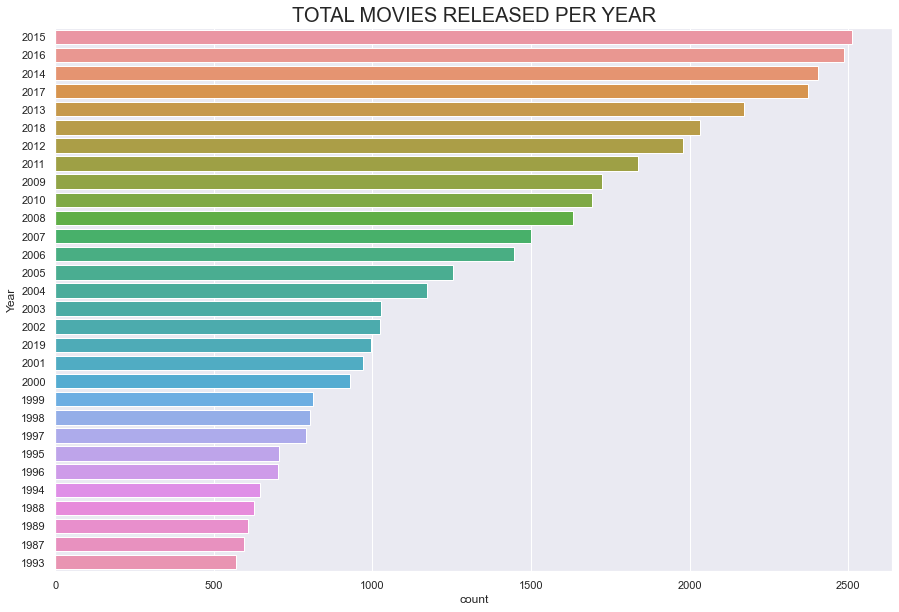

In [107]:
# Plot movies released per year
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y=df_movies['Year'], data=df_movies, order=df_movies['Year'].value_counts().index[0:30])
ax.set_title('TOTAL MOVIES RELEASED PER YEAR', fontsize= 20)

observing the  graph above it is clear that most movies were released between 2015-2013,with 2015 as a year the year when most of the movies were released.

##  4.Insights on actors 

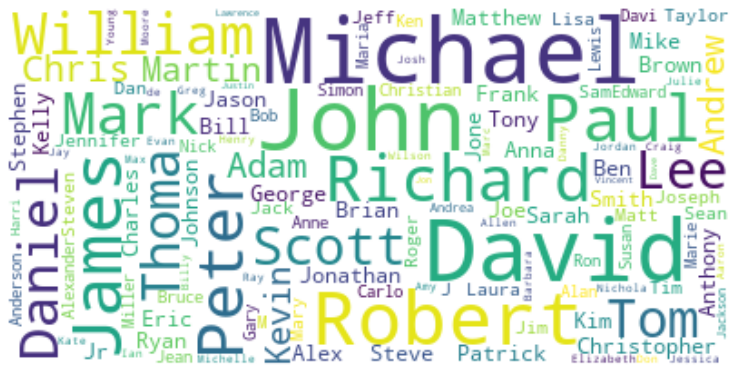

In [126]:
#df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))
#all_words2 = ''.join([label for label in movies_genres['genres']])
gen2 = df['title_cast'].explode()
text = list(set(gen2))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=400,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

From the word cloud above we see some popular actors like :
* Martin larence known for comedic who acted in movies like Big mama,Bad Boys for life.
* Micheal.j fox is a film and television act renowned for his best role as Marty Mcfly in the Back to the future trilogy.
* Tom Hanks one of the most popular actors ,he made his film debut with a minor role in the horror film(He knows you are alone)

## 5.Insights on directors

In [135]:
def count_directors(df, count = 10):
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    index2_names = directors[directors['director']=='See full summary'].index
    directors.drop(index2_names, inplace = True)
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)

In [136]:
def feature_count(df, column):
    plt.figure(figsize=(14,7))
    ax = sns.barplot(x =df['count'] , y= df[f'{column}'], palette='Greens_r')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Number of Movies Per', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel('Director')
    plt.show()

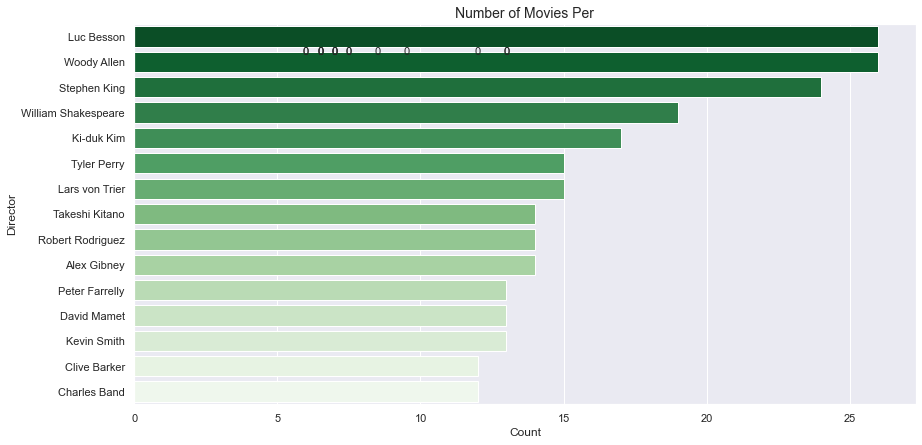

In [137]:
directors = count_directors(df_imdb)
feature_count(directors.head(15), 'director')

Observation:From the bar graph above,we oberserve that the following top 5 directors have the highiest number of movies directed
* Woody Allen
* Luc Besson
* Stephen King 
* Wiliam Shakespare
* KI-duk Kim
we also see some of the most popular directors that we know like Tyler Perry


    

# Data Preparation and cleaning

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data.

In [18]:
df_train['rating'].value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

In [19]:
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

- we dont have missing data

In [21]:
train_copy = df_train.copy()
len(train_copy)

10000038

# Modelling  Phase : Building recommendation system

- Recommendation systems are usually built using 3 techniques which are content based filtering, collaborative filtering and the combinationation of both.
- We will focus on the Content based and collaborative and later choose the best recommender system for our streamlit app

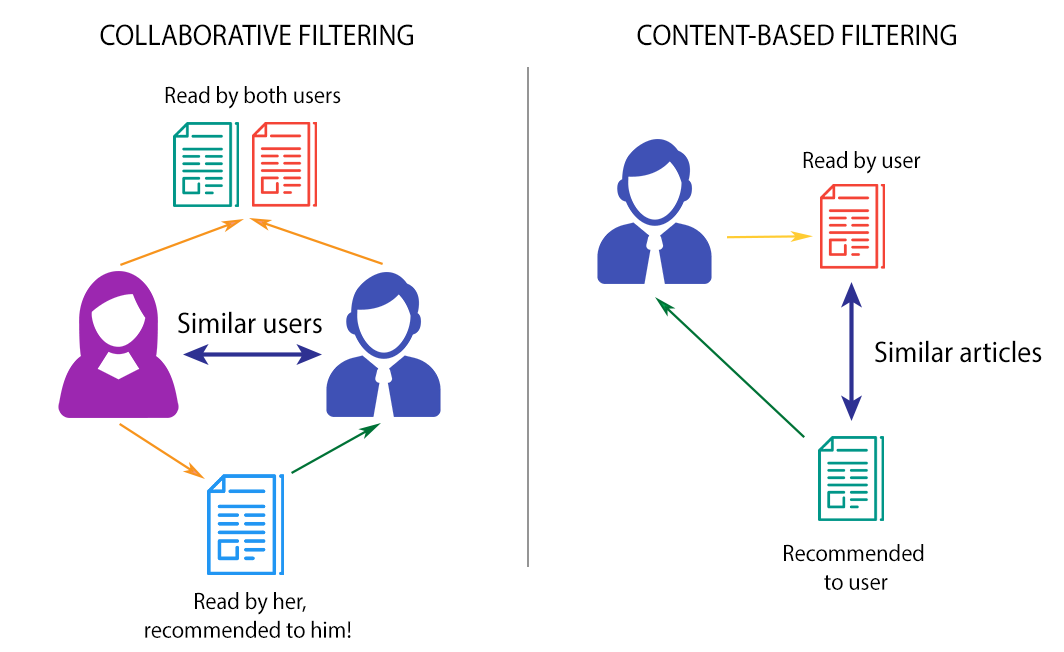

## Content based filtering

This algorithm recommends a movie thatis similiar to the ones the user has watched. This means the system looks for look alike movies. E.g action movies with the same tags will be recommended to the user.
Only it looks similar between the content and does not focus more on the person who is watching this. Only it recommends the product which has the highest score based on past preferences.

In [5]:
#Split  genre column string into a string array
df_movies['genres'] = df_movies['genres'].str.split('|')

# Convert genres to string value
df_movies['genres'] = df_movies['genres'].fillna("").astype('str')

In [6]:
#sample of the movies genres  

sample_genre= df_movies['genres'].head(20000)

- We use vectorizer called Term Frequency (TF) and inverse document frequency (IDF) > TF-IDF.
- This vectorizer helps retrieve important info in text, searching for relevance importance in a text, documents etc.
- We utilise TfidfVectorizer function for this step

In [7]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
genre_vect = tf.fit_transform(sample_genre)

### Finding the Similarities between movies using cosine similarity
To find the similarities between two movies we made use of the Cosine Similarity to calculate a numeric quantity that denotes the similarity between the two movies. This is achieved using the sklearn's linear_kernel library to generate the cosine similarities.
We then create recommendations function that returns top 10 recommended movies

In [9]:
cosine_sim = linear_kernel(genre_vect, genre_vect)

In [10]:
def genre_recommendations(movie):
    
    # Build a 1-dimensional array with movie titles
    movie_index=pd.Series(df_movies.index,index=df_movies['title'])
    
    #generate  similarities between the movie title and movie index based on genre
    similarities=list(enumerate(cosine_sim[movie_index[movie]]))
    #generate the top 10 similarities
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[1:11]
    recommended_movies= df_movies['title'].iloc[[i[0] for i in similarities]]
    
    # returns top 10 movies
    return recommended_movies

### Top 10 recommendations based on a movie title

In [13]:
genre_recommendations('American President, The (1995)')

10                  American President, The (1995)
51                         Mighty Aphrodite (1995)
57               Postman, The (Postino, Il) (1994)
92                          Beautiful Girls (1996)
193                 Something to Talk About (1995)
221                        Don Juan DeMarco (1995)
229    Eat Drink Man Woman (Yin shi nan nu) (1994)
278                           Nobody's Fool (1994)
346                        Corrina, Corrina (1994)
354                     I Like It Like That (1994)
Name: title, dtype: object

The recommender syestem was able to get comedy like movies to macth the comedy genre of the movie American President, The(1995).

**Pros of this system**
- Doesnt have a cold-start problem (we dont need data on other users)
- Can recommend new,unpopular items and also to users with unique tastes.

**Cons of this system**
- It does not recommend items outside a user's content profile

## Collaborative filtering

Collaborative based filtering recommender systems are based on past interactions of users who like the same type of movies. This system searches for look alike movies users and offer movie recommendation based on the similar taste of users. E.g if User A whatched movies X,Y,Z and user B watched movies X,Y, W. The system will recommend movie Z to User B and movie W to User A. This system is used by apps like Youtube and Netflix.


This system uses a module called  **Surprise from sckit-learn library** which helps build and analyse recommnder systems using ratings of users.

In this problem we use models that use **basic algorithms** such as **BaselineOnly** and models that use **Matrix Factorization** such **SVD, SVDPP, CO-clustering and NMF**

### Models used

- **BaselineOnly:** this algorithm predicts the baseline estimate for given user and item.
- **SVD:** this algorithm is equivalent to Probabilistic Matrix Factorization ( which makes use of data provided by users with similar preferences to offer recommendations to a particular user).

- **SVDpp:** this algorithm is an extension of SVD that takes into account implicit ratings.

- **NMF:** this is a collaborative filtering algorithm based on Non-negative Matrix Factorization.similar to SVD.

- **Coclustering:** is a collaborative filtering algorithm based on co-clustering.

In [22]:
# Reads the data with specicied ratings and loads the data
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(train_copy[['userId', 'movieId', 'rating']], reader)

#### BaselineOnly Model

In [23]:
bl = BaselineOnly()

trainset, testset = train_test_split(data, test_size = 0.1)

# train and test algorithm.
bl.fit(trainset)

predictions_b = bl.test(testset)

# Compute and print Root Mean Squared Error
r1 = accuracy.rmse(predictions_b, verbose=True)

Estimating biases using als...
RMSE: 0.8642


#### Coclustering Model

In [24]:
cc = CoClustering()

trainset, testset = train_test_split(data, test_size = 0.1)

# train and test algorithm.
cc.fit(trainset)

predictions_cc = cc.test(testset)

# Compute and print Root Mean Squared Error
r2 = accuracy.rmse(predictions_cc, verbose=True)

RMSE: 0.9065


#### NMF Model

In [26]:
nmf = NMF()

trainset, testset = train_test_split(data, test_size = 0.1)

# train and test algorithm.
nmf.fit(trainset)

predictions_nmf = nmf.test(testset)

# Compute and print Root Mean Squared Error
r3 = accuracy.rmse(predictions_nmf, verbose=True)

RMSE: 0.8825


#### SVD cross-validation technique

In [ ]:
svd_cross= SVD(verbose=True, n_epochs=12)
cross_validate(svd_cross, data, measures=['RMSE'], cv=4, verbose=True)

#### SVD Model 

In [ ]:
# SVD model

svd = SVD()

trainset, testset = train_test_split(data, test_size = 0.1)

# train and test algorithm.
svd.fit(trainset)

predictions_svd = svd.test(testset)

# Compute and print Root Mean Squared Error
r4 = accuracy.rmse(predictions_svd, verbose=True)

**Hyperparameter Tuning using SVD++/SVDPP**

In [ ]:
svdp = SVDpp()

trainset, testset = train_test_split(data, test_size = 0.1)

# train and test algorithm.
svdp.fit(trainset)
predictions_svdp = svdp.test(testset)

# Compute and print Root Mean Squared Error
r5 = accuracy.rmse(predictions_svdp, verbose=True)

#### summary table

In [ ]:

# initialise data of lists.
data1 = {'Test RMSE':[round(r1, 3),round(r2, 3),round(r3,3),round(r4,3),round(r5,3)]}
 
# Creates pandas DataFrame.
df = pd.DataFrame(data1, index =['BaselineOnly', 'Coclustering', 'NMF', 'SVD','SVDpp'])
 
# print the data
df

- We can see in the above table that svd and svdpp have the lowest test RMSE as compared to the other models
- We are going to use SVD/SVpp to make predictions on the test dataset below

# Generating  outputs

In [37]:
pred_svd_hyper = [svd.predict(row.userId,
                                         row.movieId) for idx,row in df_test.iterrows()]

# Converting the predictions to a dataframe
test_pred_svd_hyper = pd.DataFrame(pred_svd_hyper)


### Make  kaggle Submission
 - we use the best perfoming model svd model above

In [38]:
# Rename the fields in the prediction dataframe
test_pred_svd_hyper.drop(['r_ui', 'details'], axis=1, inplace=True)
test_pred_svd_hyper = test_pred_svd_hyper.rename(columns={'uid':'userId',
                                                          'iid':'movieId',
                                                          'est':'rating'})
test_pred_svd_hyper.head()

,userId,movieId,rating
0,1,2011,3.446653
1,1,4144,4.065873
2,1,5767,3.452344
3,1,6711,3.745167
4,1,7318,3.138454


In [39]:
# Concatenate each userId and movieId into a single Id column for submission
test_pred_svd_hyper['Id'] =  test_pred_svd_hyper['userId'].astype(str).str.zfill(1) + '_' + test_pred_svd_hyper['movieId'].astype(str).str.zfill(1)

In [40]:
svd_hyper_predictions = test_pred_svd_hyper[['Id','rating']]
svd_hyper_predictions.head()

,Id,rating
0,1_2011,3.446653
1,1_4144,4.065873
2,1_5767,3.452344
3,1_6711,3.745167
4,1_7318,3.138454


In [41]:
svd_hyper_predictions.to_csv('submission.csv', index=False)

# Conclusion

# Refrerences
* https://colab.research.google.com/github/Nyandala/Recommender-System-Predict-Unsupervised-Machine-Learning/blob/main/Recommender_System_Unsupervised_ML.ipynb

* https://github.com/NicoleMeinie/Recommender-system/blob/master/Recommender_system_using_SVD.ipynb

* https://colab.research.google.com/github/google/eng-edu/blob/main/ml/recommendation-systems/recommendation-systems.ipynb?utm_source=ss-recommendation-systems&utm_campaign=colab-external&utm_medium=referral&utm_content=recommendation-systems


* https://towardsdatascience.com/how-to-build-a-movie-recommendation-system-67e321339109

## End of comet experiment

In [ ]:
# end of comet

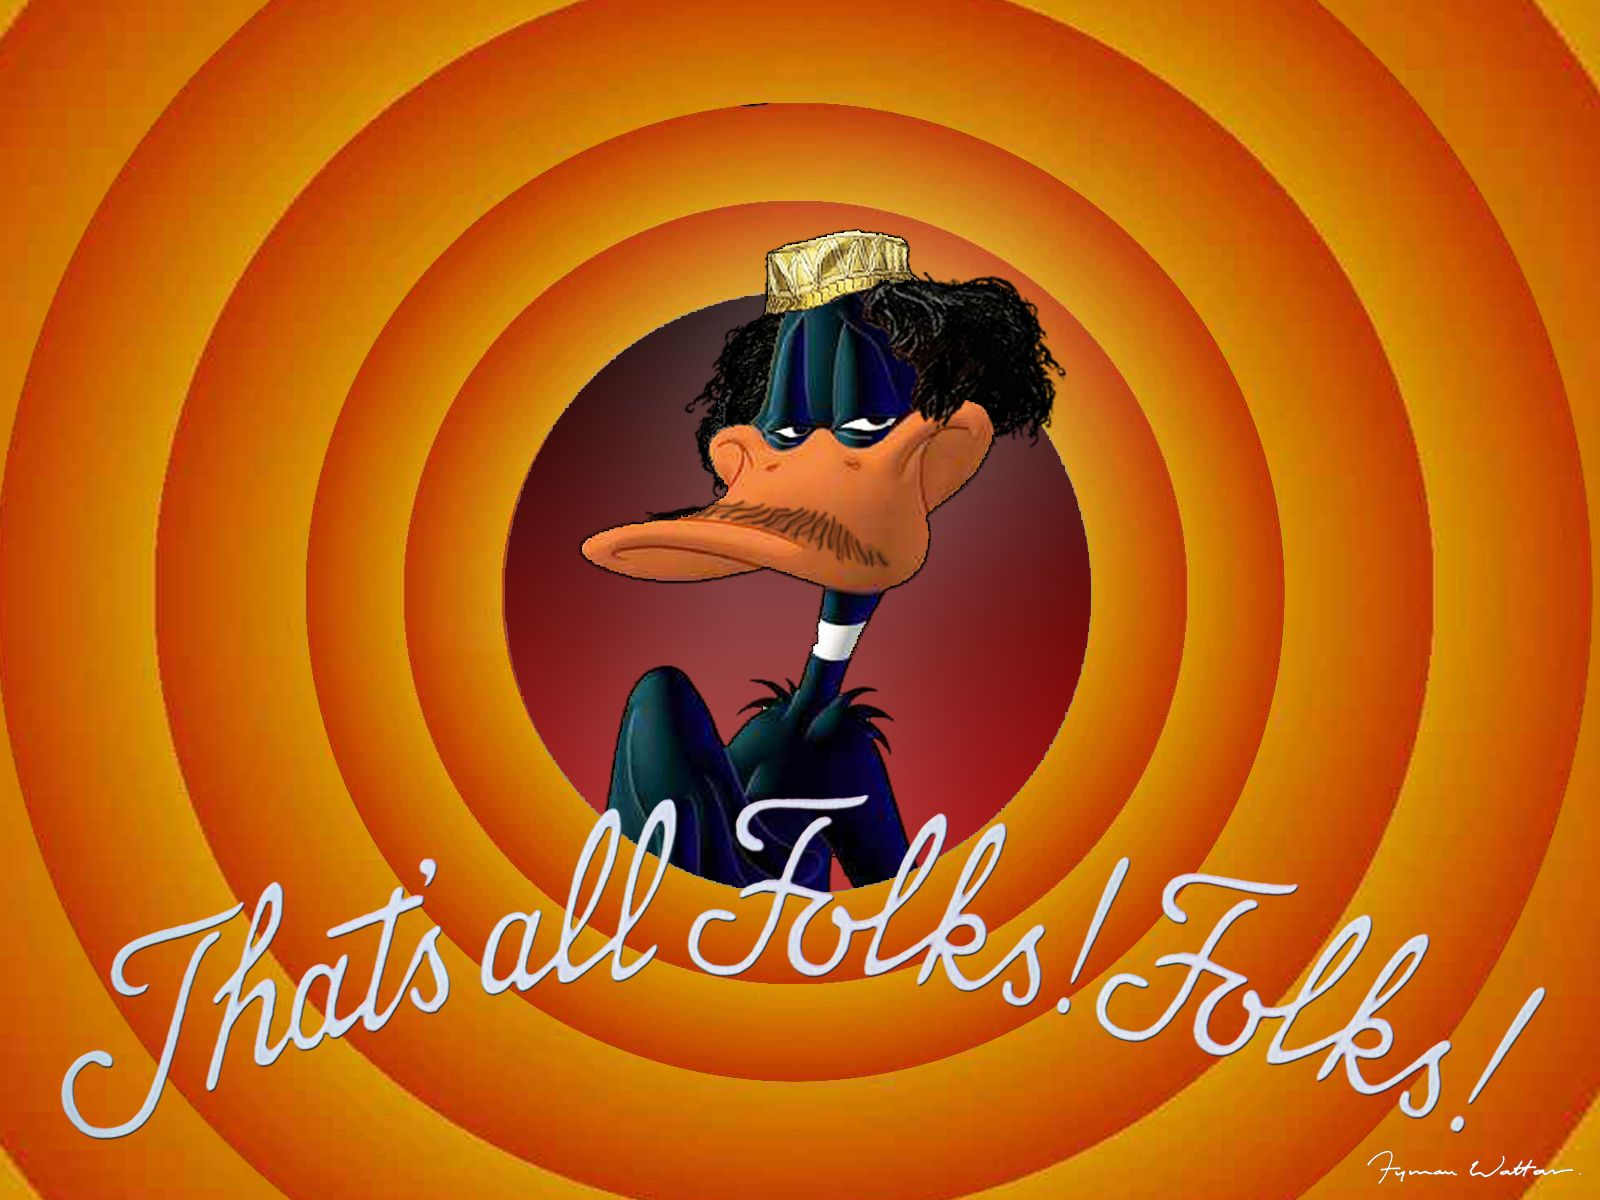

In [ ]:
a